<a href="https://colab.research.google.com/github/amankc/Fall24---Modeling/blob/main/assignment-01/Assigment01_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part I: Instructions
In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in the example notebook with the following parameters:

Nt = 200

mu_x = 1.5

s_x = 2.1

min_x = 1.25
, where min_x is a new parameter that is the minimum step size at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than min_x by using a while loop to keep generating step sizes until the step size exceeds min_x. Do this for Nx = 1,000 random walkers.



In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#initializing the variables=
Nt = 200 #number of steps
Nx = 1000 #number of people

mu_x = 1.5 #mean step length
s_x = 2.1 #std of step length
min_x = 1.25 #setting criteria or minimum length


In [69]:
# Create a new container for all walkers at each time step. This will correspond to an
# array of zeros that has Nt rows and Nx columns. So each row corresponds to a specific
# time step and each column corresponds to a specific walker.
X = np.zeros((Nt,Nx))

# create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x * np.random.randn() + mu_x

        # Ensure the step size is more than min_x
        while x_i < min_x:
            x_i = s_x * np.random.randn() + mu_x

        if(i==0):
              # If at the first time step, the initial position was 0
              X[i,j] = 0.0 + x_i
        else:
              # If at a subsequent time step, the initial position was the position at the previous time step
              X[i,j] = X[i-1,j] + x_i

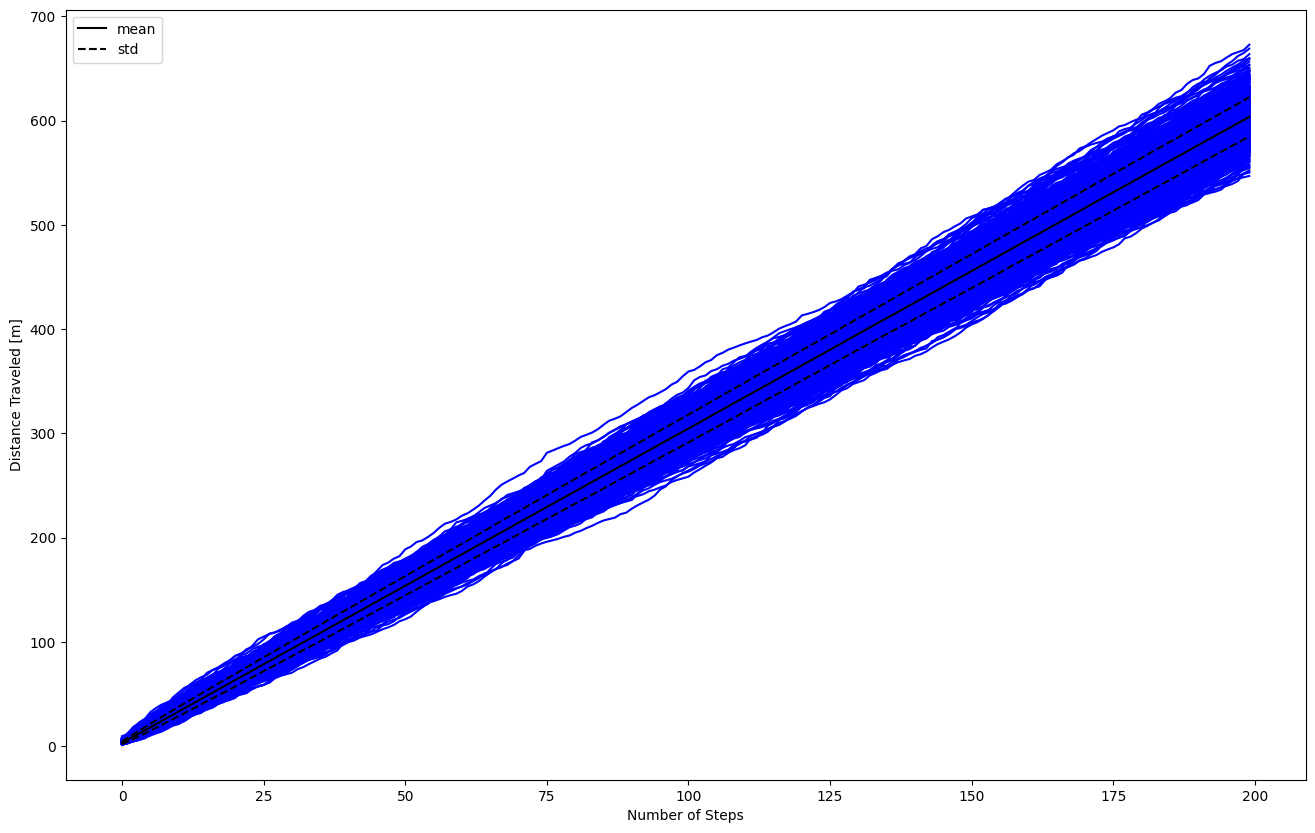

In [72]:
mean_X = np.mean(X,axis=1) # Calculate the average distance of all walkers through time
std_X = np.std(X,axis=1) # Calculate the standard deviation of all walkers through time

plt.figure(figsize=(16,10)) #setting the figure size

plt.plot(np.arange(Nt),X,'b-')
plt.plot(np.arange(Nt),mean_X,'k-',label = 'mean')
plt.plot(np.arange(Nt),mean_X + std_X, 'k--')
plt.plot(np.arange(Nt),mean_X - std_X, 'k--',label = 'std')
plt.xlabel('Number of Steps')
plt.ylabel('Distance Traveled [m]')
plt.legend()
plt.show()


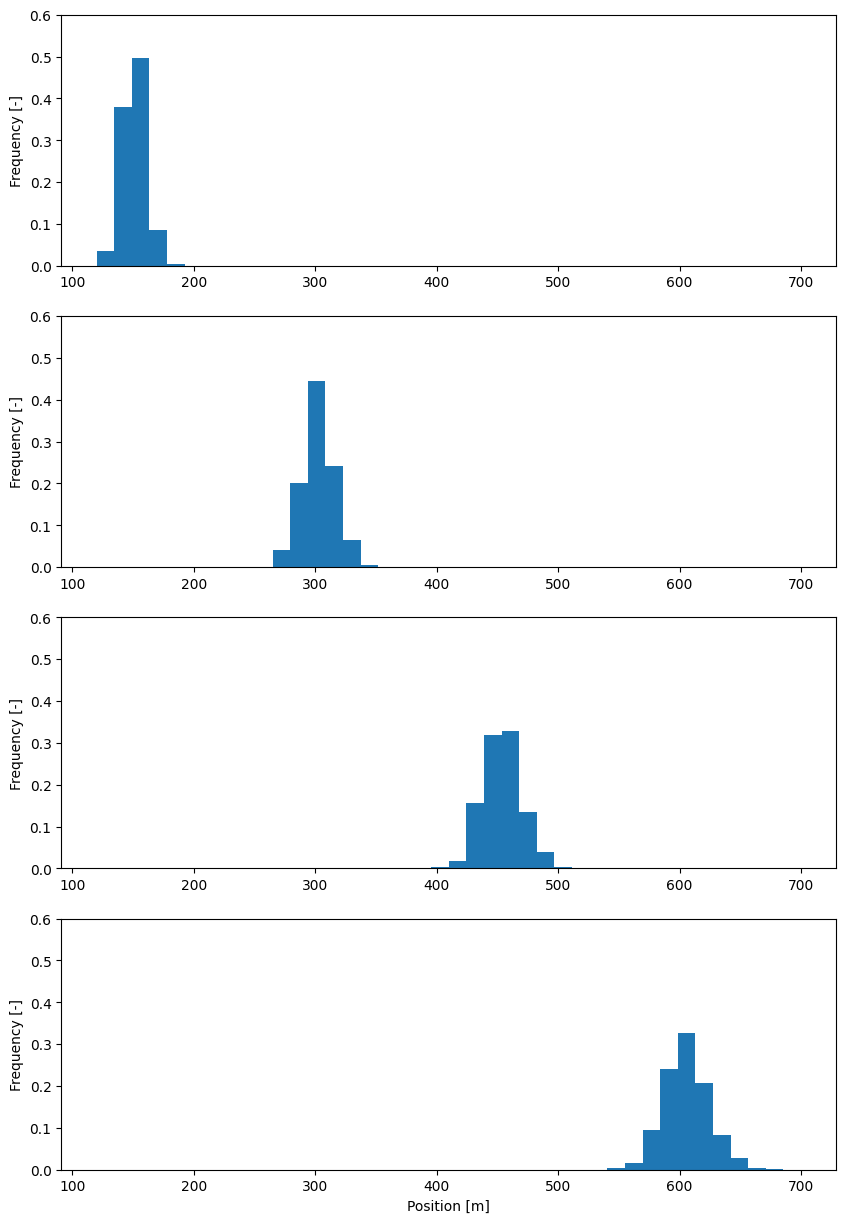

In [50]:
x_50, be_50 = np.histogram(X[49,:], bins=40,range = (120,700)) #x_50 stores the array of histogram values, be_50 stores the array of bin values for the 51st person (starts from 0th index)
x_100, be_100 = np.histogram(X[99,:], bins=40,range = (120,700))
x_150, be_150 = np.histogram(X[149,:], bins=40,range = (120,700))
x_200, be_200 = np.histogram(X[-1,:], bins=40,range = (120,700))

plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0])) #first term gets the average position to plot the bar,
                                        #second term nowmalizes the raw histogram values based on the total sum, bin width is the difference between two consecutive values
plt.ylim((0.0,0.6))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.6))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.6))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.6))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')

plt.show()

##Part II: Instructions

In this part of the assignment, your task is to create a two-dimensional random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are independent of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa.
Use the following parameters:

Nt = 300

Nx = 3

mu_x = 0.5

s_x = 1.5

mu_y = 5.0

s_y = 2.5
, where mu_y and s_y are, respectively, the average and standard deviation of the step size in the y-direction.

In [75]:
Nt = 300 #number of steps
Nx = 3 #number of people

mu_x = 0.5 #mean in x-direction
s_x = 1.5 #std in x-direction
mu_y = 5.0 #mean in y-direction
s_y = 2.5 #std in y-direction

In [76]:
X = np.zeros((Nt,Nx))
Y = np.zeros((Nt,Nx))
# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x*np.random.randn() + mu_x
        y_i = s_y*np.random.randn() + mu_y
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i
            Y[i,j] = 0.0 + y_i
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i
            Y[i,j] = Y[i-1,j] + y_i

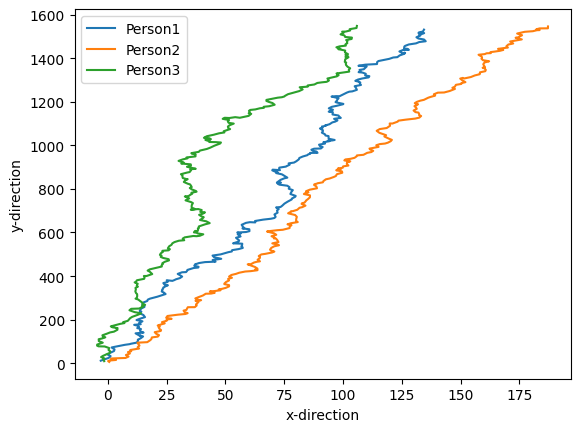

In [77]:
plt.plot(X[:,0],Y[:,0],label='Person1') #plotting the location based on x-coord abd y_coord
plt.plot(X[:,1],Y[:,1],label='Person2')
plt.plot(X[:,2],Y[:,2],label='Person3')
plt.xlabel('x-direction')
plt.ylabel('y-direction')
plt.legend()
plt.show()